# Exploratory Data Analysis

## Questions/Goals

* How many examples of each label are present?
* How long are the poems? How long are poems for each category? Measure by character length and word count.
* Is there a significant difference in length or word count among any of the categories?
* What is the frequency of stop words in the poems? By category?
* What are the frequencies of the words (excluding stopwords) in the poems by each category? [Bar charts and word clouds]

## Initial Setup

In [1]:
import os
import dotenv

In [2]:
dotenv.load_dotenv()

True

In [3]:
proj_dir = os.getenv('PROJ_DIR')

In [4]:
os.chdir(proj_dir)

## Import Data

In [5]:
import pandas as pd

In [6]:
data_path = './src/data/Poem_classification - train_data.csv'

In [7]:
poems_with_subject_labels = pd.read_csv(data_path, encoding='UTF-8').dropna()

## Data Exploration

Basic view of data

In [8]:
poems_with_subject_labels.sample(10)

,Genre,Poem
319,Death,how much history is enough history before ...
358,Death,"In the cold heavy rain, through its poor lens,..."
143,Music,"ProsperoAssume, just for a moment,I am denied ..."
595,Affection,When you appeared it was as ifmagnets cleared ...
307,Death,From our old friendshipI never thought I'd eve...
742,Environment,"O world, I cannot hold thee close enough!Thy w..."
561,Affection,Twigs collectby the side of the path.Wild flow...
531,Affection,"Start with a base map, unlabeled terrain, in s..."
341,Death,I that in heill was and gladness Am trublit no...
785,Environment,The jacaranda blooms beside the drunk stick tr...


Comparing number of examples for each category

<AxesSubplot: >

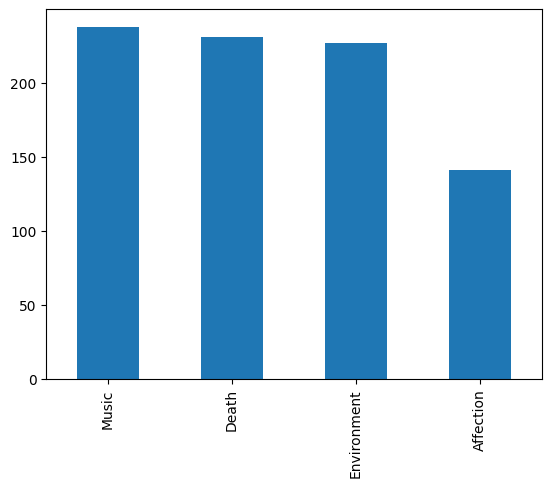

In [9]:
poems_with_subject_labels['Genre'].value_counts().plot.bar()

Distribution of character counts in poems

<AxesSubplot: >

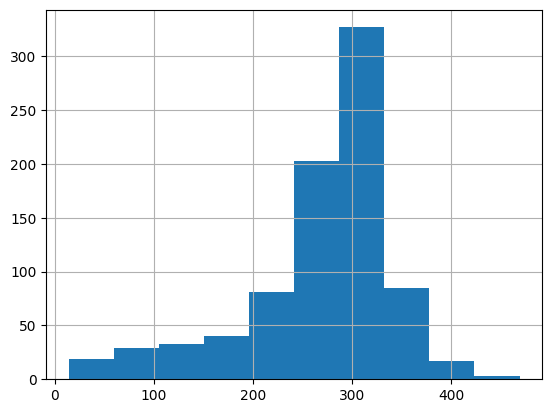

In [10]:
poems_with_subject_labels['Poem'].str.len().hist()

Distribution of word counts in poems

<AxesSubplot: >

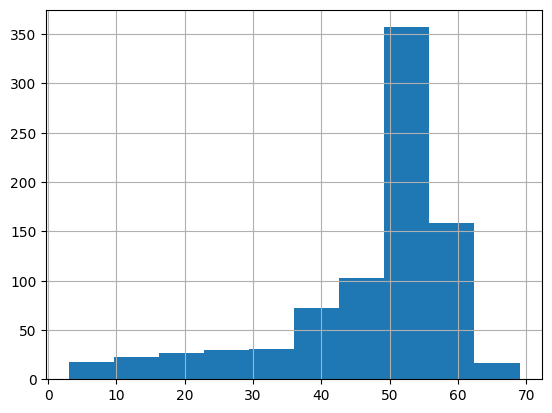

In [11]:
poems_with_subject_labels['Poem'].str.split().map(lambda words: len(words)).hist()

Is there a significant difference between the word counts of each poem category?

In [12]:
poems_with_subject_labels['word_count'] = poems_with_subject_labels['Poem'].str.split().map(lambda words: len(words))

In [13]:
import numpy as np

for label in poems_with_subject_labels['Genre'].unique():
    word_count_estimate = np.average(poems_with_subject_labels[poems_with_subject_labels['Genre'] == label]['word_count'])
    print(f'Mean word count estimate for {label}: {word_count_estimate}')

Mean word count estimate for Music: 46.247899159663866
Mean word count estimate for Death: 48.246753246753244
Mean word count estimate for Affection: 48.02127659574468
Mean word count estimate for Environment: 44.40088105726872


Music word count distribution

<AxesSubplot: >

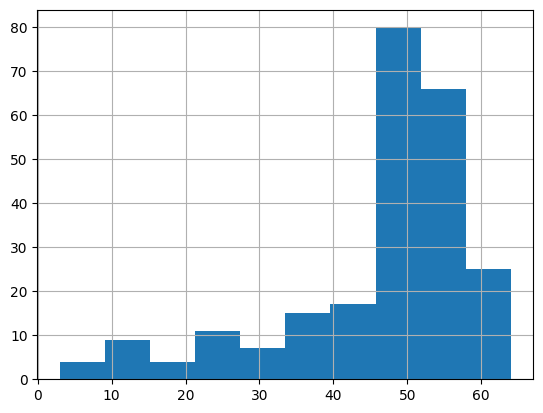

In [14]:
poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Music']['word_count'].hist()

Death word count distribution

<AxesSubplot: >

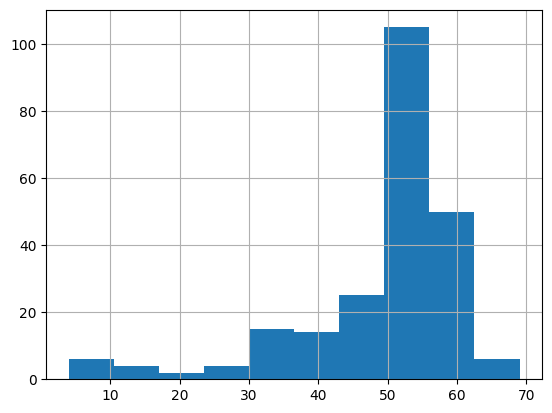

In [15]:
poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Death']['word_count'].hist()

Affection word count distribution

<AxesSubplot: >

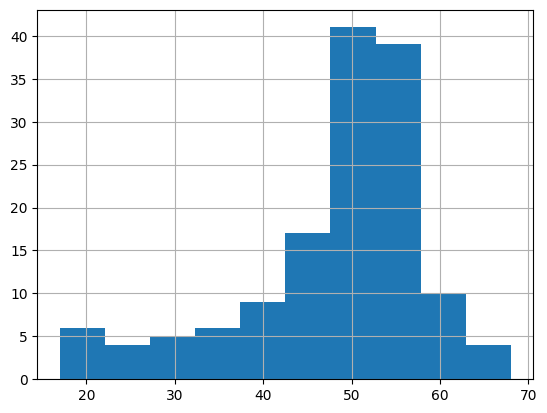

In [16]:
poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Affection']['word_count'].hist()

Environment word count distribution

<AxesSubplot: >

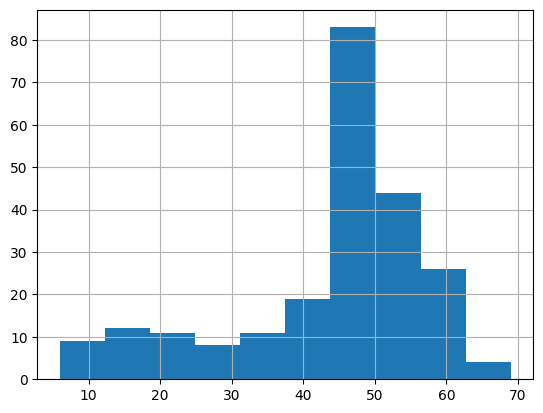

In [17]:
poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Environment']['word_count'].hist()

In [44]:
from scipy.stats import f_oneway

f_oneway(
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Music']['word_count'],
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Death']['word_count'],
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Affection']['word_count'],
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Environment']['word_count']
)

F_onewayResult(statistic=4.338155435804413, pvalue=0.004809289975111501)

In [38]:
from scipy.stats import ttest_ind

ttest_ind(
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Death']['word_count'],
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Music']['word_count']
)

Ttest_indResult(statistic=1.770071910561426, pvalue=0.07736757762877172)

In [36]:
ttest_ind(
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Death']['word_count'],
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Affection']['word_count']
)

Ttest_indResult(statistic=0.18877372465045947, pvalue=0.8503736656109813)

In [45]:
ttest_ind(
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Death']['word_count'],
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Environment']['word_count']
)

Ttest_indResult(statistic=3.1945018600282933, pvalue=0.0014978237850211068)

In [46]:
ttest_ind(
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Music']['word_count'],
    poems_with_subject_labels[poems_with_subject_labels['Genre'] == 'Environment']['word_count']
)

Ttest_indResult(statistic=1.4757865480305241, pvalue=0.14068093210108937)

Stop word frequency distribution

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords as nltk_stopwords

def count_stop_words(corpus: str) -> int:
    stop_words = set(nltk_stopwords.words('english'))
    corpus_contents = corpus.split()
    stop_word_count = 0
    for word in corpus_contents:
        if word in stop_words:
            stop_word_count += 1
    return stop_word_count

In [ ]:
poems_with_subject_labels['stop_word_count'] = poems_with_subject_labels['Poem'].apply(count_stop_words)

In [ ]:
poems_with_subject_labels['stop_word_count'].hist()